<h2> Image Rotation </h2>


- Consider a point P(x, y), which is rotated by an angle $\beta$ around the origin O(0, 0), and is transformed to P'(x', y').
- Assuming that the distance between point P and origin O is r:

$$ r = \sqrt{x^2 + y^2} = \sqrt{x'^2 + y'^2} $$ 

- Here, the distance from the origin remains the same even after rotation

<br><br>

- The rotation matrix can be represented by:


$$\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} cos(\beta) & -sin(\beta) \\ sin(\beta) & cos(\beta) \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$$ 

_Assumption: Angles in the anti-clockwise direction are positive._

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

from numpy import ndarray

%matplotlib inline

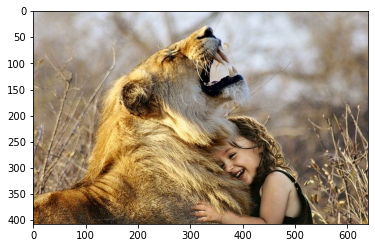

In [2]:
img = cv2.imread("../Graphics/Chapter01/Figure1.03.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [3]:
def rotate_basic(img: ndarray, degree: int) -> ndarray:
    """
    Here the size of the rotated image is assumed to be the same as the original image
    """
    
    rad = math.radians(degree)
    
    h, w = img.shape[:2]
    
    x_centre = w // 2
    y_centre = h // 2
    
    rot_mat = np.zeros((img.shape), dtype = np.uint8)
    
    for i in range(h):
        for j in range(w):
            x_prime = round((i - x_centre) * math.cos(rad) + (j - y_centre) * math.sin(rad)) + x_centre
            y_prime = round((-1) * (i - x_centre) * math.sin(rad) + (j - y_centre) * math.cos(rad)) + y_centre
            
            if (x_prime >= 0 and y_prime >= 0 and x_prime < h and y_prime < w):
                rot_mat[i, j, :] = img[x_prime, y_prime, :]
    
    return rot_mat

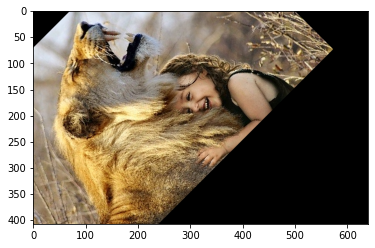

In [4]:
basic_rotated_img = rotate_basic(img, 45)
plt.imshow(basic_rotated_img)

In [5]:
def rotate(img: ndarray, degree: int) -> ndarray:
    """
    Here, the entire image is displayed after rotation
    """
    
    rad = math.radians(degree)
    
    h, w = img.shape[:2]
    
    x_centre = h // 2
    y_centre = w // 2
    
    new_h = round(abs(h * math.cos(rad))) + round(abs(w * math.sin(rad)))
    new_w = round(abs(w * math.cos(rad))) + round(abs(h * math.sin(rad)))
    
    rot_mat = np.zeros((new_h, new_w, img.shape[2]), dtype = np.uint8)
    
    x_prime_centre = new_w // 2
    y_prime_centre = new_h // 2
    
    for i in range(rot_mat.shape[0]):
        for j in range(rot_mat.shape[1]):
            x_prime = round((i - x_prime_centre) * math.cos(rad) + (j - y_prime_centre) * math.sin(rad)) + x_centre
            y_prime = round((-1) * (i - x_prime_centre) * math.sin(rad) + (j - y_prime_centre) * math.cos(rad)) + y_centre
            
            if (x_prime >= 0 and y_prime >= 0 and x_prime < h and  y_prime < w):
                rot_mat[i, j, :] = img[x_prime, y_prime, :]
    
    return rot_mat

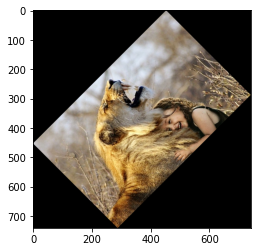

In [6]:
basic_rotated_img = rotate(img, 45)
plt.imshow(basic_rotated_img)